In [1]:
import numpy as np
import matplotlib.pyplot as plt


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
path='../functions/'
import sys
sys.path.append(path)

In [3]:
#Importation of necessary functions (centernin: matrix centering, P_I: power iteration, deflatio: deflation)
from deflation import centering, P_I, deflation

In [4]:
#Definition of pca function for the principle component analysis
def pca(A, n_iter, epsilon):
  A_centred, cov=centering(A)
  eigenval, eigenvec=deflation(cov, n_iter, epsilon )
  indices=np.argsort(eigenval)[::-1]
  eigenvec_sorted=eigenvec[:, indices]
  PC1=eigenvec_sorted[: , 0]
  PC2=eigenvec_sorted[: , 1]
  p1=np.dot(A_centred, PC1)
  p2=np.dot(A_centred, PC2)
  return p1, p2, PC1, PC2


In [5]:
with open('../data/iris.txt', 'r') as data:
  labels=[]
  variables=[]
  for line in data:
    line=line.strip().split(',')
    if len(line) < 5:
      continue
    v=[float(var) for var in line[0:4]]
    variables.append(v)
    label=line[4]
    labels.append(label)
  variables=np.array(variables)

In [6]:
p1, p2, PC1, PC2=pca(variables, n_iter=100, epsilon=1e-6 )

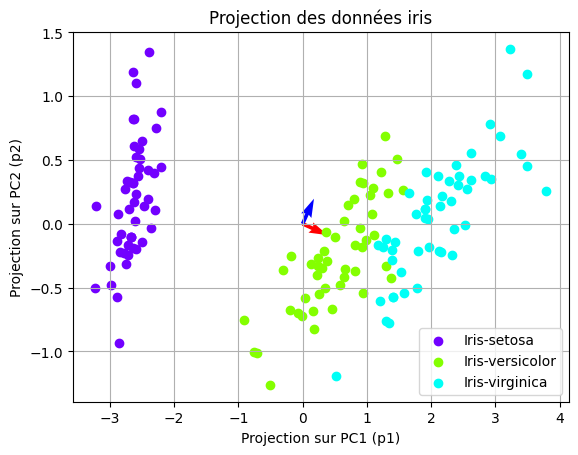

In [7]:
import seaborn as sb

#Setting different classes without duplicates
classes=list(set(labels))
#Color palette creation
colors=sb.color_palette('hsv', len(classes))

#Creation of a dictionary attributing every classe to a specific color
cmap=dict(zip(classes, colors))

#Origins of PC1 and PC2
or1=np.mean(p1)
or2=np.mean(p2)

#plot of the first principle direction
plt.quiver(or1, or2, PC1[0], PC1[1],angles='xy', color='r' )

#plot of the second principle direction
plt.quiver(or1, or2, PC2[0], PC2[1], angles='xy', color='b')

#plot of the projected points
for i in range(len(variables)):
  plt.scatter(p1[i], p2[i], color=cmap[labels[i]], label=labels[i] if i==labels.index(labels[i]) else "")

plt.grid('True')
plt.xlabel('Projection sur PC1 (p1)')
plt.ylabel('Projection sur PC2 (p2)')
plt.title('Projection des données iris')
plt.legend()